# 目標: 
 
安裝Basemap, 並且可以使用它繪製地理資訊. 

**地理繪圖 module : Basemap**

**Basemap 是 Matplotlib 的擴展**

# 重點:

Basemap 在地圖集上的擴展應用
 
如何正確有效的使用投影法


為了使用Basemap，我們首先需要安裝它。

1. 使用 PIP

2. Command Line 手動安裝, 為了獲得Basemap，你可以從這裡獲取：

   http://matplotlib.org/basemap/users/download.html

   或者 http://www.lfd.uci.edu/~gohlke/pythonlibs/

# 手動安裝

 1. pip install pyproj-1.9.6-cp37-cp37m-win_amd64.whl

 2. pip install basemap-1.2.0-cp37-cp37m-win_amd64.whl

In [1]:
!pip install geos
!pip install pyproj


In [2]:
!pip install basemap

# 若是無法直接安裝

1. 需要手動下載: basemap-1.2.1-cp38-cp38-win_amd64.whl 檔

2. 開啟terminal

3. 在命令列 pip install basemap-1.2.1-cp38-cp38-win_amd64.whl 

**新建地圖**<br>
Basemap有很多屬性，這里全都使用默認参數<br>
map = Basemap() <br>

lat_0 和 lon_0 是地圖中心的緯度和經度<br>
地圖圖片大小寬度 : llcrnrlat、urcrnrlat<br>
地圖大小縱度 : llcrnrlon、urcrnrlon<br>

https://ithelp.ithome.com.tw/articles/10204536

**畫圖**<br>
`map.drawmapboundary()` : 繪製邊界<br>
`map.drawstates()` : 繪製州<br>
`map.drawcoastlines()` : 繪製海岸線<br>
`map.drawcountries()` : 繪製國家<br>
`map.drawcounties()` : 繪製縣

`map.drawparallels()` : 繪製緯線<br>
`map.drawmeridians()` : 繪製經線

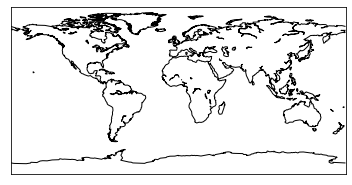

<Figure size 432x288 with 0 Axes>

In [5]:
# 導入開發套件
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# 新建地圖
map = Basemap() #Basemap有很多屬性，這里全都使用默認参數

# 畫圖
map.drawcoastlines()

# 顯示结果
plt.show()

# 儲存结果
plt.savefig('World map.png')

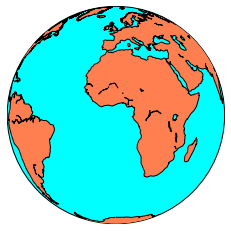

<Figure size 432x288 with 0 Axes>

In [6]:
# 更改投影方式
map = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 0)
#’ortho’指正射投影，後面兩個參數是設置中心點

# 給整個地圖上藍色, draw + map + boundary
map.drawmapboundary(fill_color = 'aqua')

# 給陸地塗上珊瑚色，湖泊塗上藍色
map.fillcontinents(color = 'coral', lake_color = 'aqua')

# 畫圖
map.drawcoastlines()

# 顯示結果
plt.show()

# 儲存结果
plt.savefig('Earth.png')

# 加入經緯度的座標

1. 獲得它們的實際座標開始, 坐標需要轉換，其中西經和南緯坐標是負值，北緯和東經坐標是正值。<br>
   例如，紐約市是北緯40.7127西經74.0059。<br>
   可以在程式中定義這些座標，如：<br>
   NYClat, NYClon = 40.7127, -74.0059<br>


2. 將這些轉換為要繪製的x和y座標。<br>
   xpt, ypt = m(NYClon, NYClat)<br>
   現在已經將座標順序翻轉為lon, lat（緯度，經度）。


3. 座標通常以lat, lon順序給出。<br>
   然而，在圖形中，lat, long轉換為y, x，我們顯然不需要。在某些時候，必須翻轉它們。


4. 最後，我們可以繪製如下的坐標：<br>
   map.plot(xpt, ypt, 'c*', markersize=15)


In [7]:
def draw_map(m, scale=0.2):
      # 繪製一個陰影浮雕的地理圖像
    m.shadedrelief(scale=scale)

    # 經度與緯度將會以字典的形式返回
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # 運用 plt.Line2D 實例設置經緯線
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # 通過迴圈設置所有線條的樣式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
    plt.show()


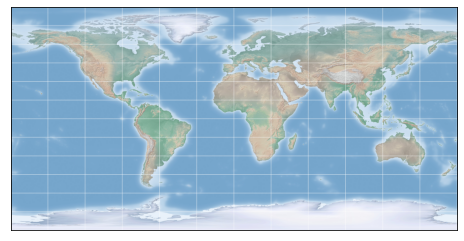

In [8]:
import numpy as np
from itertools import chain

#運用 "itertools" 庫中的 "chain" 模組，可以繪製更接近於生活中所見世界地圖的圖像
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# 繪製一個陰影浮雕的地理圖像
m.shadedrelief(scale=0.2)

# 經度與緯度將會以字典的形式返回
lats = m.drawparallels(np.linspace(-90, 90, 13))
lons = m.drawmeridians(np.linspace(-180, 180, 13))

# 運用 plt.Line2D 實例設置經緯線
lat_lines = chain(*(tup[1][0] for tup in lats.items()))
lon_lines = chain(*(tup[1][0] for tup in lons.items()))
all_lines = chain(lat_lines, lon_lines)

# 通過迴圈設置所有線條的樣式
for line in all_lines:
    line.set(linestyle='-', alpha=0.3, color='w')
plt.show()

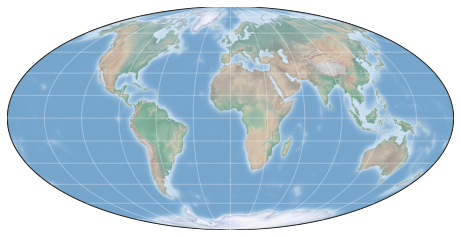

In [9]:
# Basemap 函數的 "projection" 參數值調整為 'moll' ，此時，可以得到一張橢圓形的世界地圖
fig = plt.figure(figsize=(8, 8), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)

# 從 plt.show 改成 draw_map
draw_map(m)

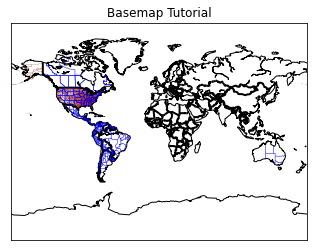

In [10]:
# Basemap 函數的 "projection" 參數值調整為 'mill' ，此時，可以得到一張平展的世界地圖

map = Basemap(projection='mill',
            llcrnrlat = -90,
            llcrnrlon = -180,
            urcrnrlat = 90,
            urcrnrlon = 180)

map.drawcoastlines()

#畫出國家，並使用線寬為2 的線條生成分界線。
map.drawcountries(linewidth=2)

#這會用藍色線條畫出州
map.drawstates(color='b')

#這會畫出國家
map.drawcounties(color='darkred')

plt.title('Basemap Tutorial')
plt.show()